# Analise dos dados de COVID-19 no estado do ES utilizando pandas e seaborn
- Dados utilizados disponível em https://coronavirus.es.gov.br/painel-covid-19-es

1. Listando em, ​ordem alfabética, as cidades do estado com mais de N casos de COVID-19

In [379]:
import pandas as pd
import numpy as np

In [380]:
data = pd.read_csv("data/COVID-ES.csv", sep=";", encoding="latin1", usecols=["DataNotificacao", "Municipio", "DataDiagnostico", "DataObito", "IdadeNaDataNotificacao", "Classificacao", "FicouInternado", "ComorbidadePulmao", "ComorbidadeCardio", "ComorbidadeRenal", "ComorbidadeDiabetes", "ComorbidadeTabagismo", "ComorbidadeObesidade"], parse_dates=["DataNotificacao", "DataDiagnostico", "DataObito"])
data.sort_values(by=["Municipio", "DataDiagnostico"], ascending=True, inplace=True)
data.dropna(how="all", inplace=True)
data.head()

,DataNotificacao,DataDiagnostico,DataObito,Classificacao,Municipio,IdadeNaDataNotificacao,ComorbidadePulmao,ComorbidadeCardio,ComorbidadeRenal,ComorbidadeDiabetes,ComorbidadeTabagismo,ComorbidadeObesidade,FicouInternado
4511603,2020-10-29,2020-10-26,NaT,Suspeito,ABADIA DE GOIAS,"43 anos, 5 meses, 10 dias",Não,Não,Não,Não,Não,Não,Não Informado
4096732,2021-02-06,2021-02-01,NaT,Suspeito,ABADIA DE GOIAS,"31 anos, 9 meses, 7 dias",Não,Não,Não,Não,Não,Não,Não Informado
3425308,2021-06-30,2021-06-28,NaT,Suspeito,ABADIA DE GOIAS,"51 anos, 9 meses, 2 dias",Não,Não,Não,Não,Não,Não,Não Informado
3307809,2021-07-19,2021-07-15,NaT,Descartados,ABADIA DE GOIAS,"37 anos, 3 meses, 18 dias",Não,Não,Não,Não,Não,Não,Não Informado
3161157,2021-08-19,2021-08-19,NaT,Descartados,ABADIA DE GOIAS,"45 anos, 10 meses, 28 dias",Não,Não,Não,Não,Não,Não,Não


In [381]:
cities_count = data["Municipio"].value_counts()
cities_count

Municipio
SERRA                      694949
VITORIA                    634458
VILA VELHA                 567317
CARIACICA                  440506
LINHARES                   223897
                            ...  
PANAMBI                         1
PARAGUACU                       1
PARAISOPOLIS                    1
NOVO GAMA                       1
NOVO HORIZONTE DO NORTE         1
Name: count, Length: 1987, dtype: int64

In [382]:
N = 50000
mask_cut_value = cities_count > N
more_than_n_cases_cities = cities_count[mask_cut_value]
more_than_n_cases_cities

Municipio
SERRA                      694949
VITORIA                    634458
VILA VELHA                 567317
CARIACICA                  440506
LINHARES                   223897
CACHOEIRO DE ITAPEMIRIM    209549
SAO MATEUS                 168711
COLATINA                   161823
ARACRUZ                    149699
GUARAPARI                  117297
VIANA                       85598
NOVA VENECIA                59065
SAO GABRIEL DA PALHA        57247
CASTELO                     53239
SANTA TERESA                51888
Name: count, dtype: int64

In [383]:
more_than_n_cases_cities.sort_index(inplace=True)
more_than_n_cases_cities

Municipio
ARACRUZ                    149699
CACHOEIRO DE ITAPEMIRIM    209549
CARIACICA                  440506
CASTELO                     53239
COLATINA                   161823
GUARAPARI                  117297
LINHARES                   223897
NOVA VENECIA                59065
SANTA TERESA                51888
SAO GABRIEL DA PALHA        57247
SAO MATEUS                 168711
SERRA                      694949
VIANA                       85598
VILA VELHA                 567317
VITORIA                    634458
Name: count, dtype: int64

In [384]:
ordened_cities = more_than_n_cases_cities.index
print(ordened_cities)

Index(['ARACRUZ', 'CACHOEIRO DE ITAPEMIRIM', 'CARIACICA', 'CASTELO',
       'COLATINA', 'GUARAPARI', 'LINHARES', 'NOVA VENECIA', 'SANTA TERESA',
       'SAO GABRIEL DA PALHA', 'SAO MATEUS', 'SERRA', 'VIANA', 'VILA VELHA',
       'VITORIA'],
      dtype='object', name='Municipio')


2. Determinando quantos casos de Covid-19 foram diagnosticados entre as datas d1 e d2, na qual d1 será sempre menor que d2

In [385]:
d1 = "2024-01-01"
d2 = "2024-01-30"
mask_between_date = data["DataDiagnostico"].between(d1, d2)
between_cases = data[mask_between_date]
num_between_cases = len(between_cases)
print(f'Número total de casos de COVID-19 entre {d1} e {d2}: {num_between_cases}')

Número total de casos de COVID-19 entre 2024-01-01 e 2024-01-30: 8256


3. Listando as cidades top N de casos de covid entre a data d1 e d2, na qual d1 será sempre menor que d2. A saída deverá ser ordenada em ordem decrescente por número de casos

In [386]:
between_cases
cities_count = between_cases["Municipio"].value_counts()
N = 5
cities_count_top_N = cities_count.head(N)
cities_count_top_N.sort_values(ascending=False)

Municipio
VITORIA       1670
VILA VELHA    1166
SERRA          853
SAO MATEUS     661
CARIACICA      467
Name: count, dtype: int64

4. Determinando a % de pessoas confirmadas que ficaram internadas, % de pessoas que morreram e a % de pessoas internadas que morreram, de um dado município ou de todas as cidades.

In [387]:
total_cases = len(data)
print(total_cases)

5046672


In [388]:
mask_confirmed_cases = data["Classificacao"] == "Confirmados"
confirmed_cases = data[mask_confirmed_cases]
confirmed_cases

,DataNotificacao,DataDiagnostico,DataObito,Classificacao,Municipio,IdadeNaDataNotificacao,ComorbidadePulmao,ComorbidadeCardio,ComorbidadeRenal,ComorbidadeDiabetes,ComorbidadeTabagismo,ComorbidadeObesidade,FicouInternado
3125447,2021-08-26,2021-08-23,NaT,Confirmados,ABADIA DE GOIAS,"34 anos, 7 meses, 1 dias",Não,Não,Não,Não,Não,Não,Não
3126263,2021-08-26,2021-08-23,NaT,Confirmados,ABADIA DE GOIAS,"57 anos, 9 meses, 17 dias",Não,Não,Não,Não,Não,Não,Não
2281727,2022-01-24,2022-01-20,NaT,Confirmados,ABADIA DE GOIAS,"22 anos, 10 meses, 17 dias",Não,Não,Não,Não,Não,Não,Não Informado
4722266,2020-08-24,2020-08-15,NaT,Confirmados,ABADIA DOS DOURADOS,"65 anos, 2 meses, 15 dias",Não,Sim,Não,Sim,Não,Não,Não Informado
3597758,2021-05-26,2021-05-25,NaT,Confirmados,ABADIA DOS DOURADOS,"38 anos, 0 meses, 27 dias",Não,Não,Não,Não,Não,Não,Não Informado
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4067241,2021-02-17,2021-02-14,NaT,Confirmados,VOTORANTIM,"38 anos, 0 meses, 12 dias",Não,Não,Não,Não,Não,Não,Não
4886275,2020-07-05,2020-06-24,NaT,Confirmados,VOTUPORANGA,"49 anos, 0 meses, 10 dias",Não,Não,Não,Não,Não,Não,Sim
1882324,2022-02-07,2022-01-31,NaT,Confirmados,WANDERLANDIA,"47 anos, 5 meses, 8 dias",Não,Não,Não,Não,Não,Não,Não
4671287,2020-09-15,2020-09-15,NaT,Confirmados,XANXERE,"29 anos, 11 meses, 19 dias",Não,Não,Não,Não,Não,Não,Não Informado


In [389]:
#desired_city = 'VITORIA'
#confirmed_cases = confirmed_cases[confirmed_cases["Municipio"] == desired_city]

total_confirmed_cases = len(confirmed_cases)
print(total_confirmed_cases)

1382791


In [390]:
mask_hospitalized_cases = confirmed_cases["FicouInternado"] == "Sim"
hospitalized_cases = confirmed_cases[mask_hospitalized_cases]
hospitalized_cases

,DataNotificacao,DataDiagnostico,DataObito,Classificacao,Municipio,IdadeNaDataNotificacao,ComorbidadePulmao,ComorbidadeCardio,ComorbidadeRenal,ComorbidadeDiabetes,ComorbidadeTabagismo,ComorbidadeObesidade,FicouInternado
5041917,2020-04-14,2020-04-14,2020-04-24,Confirmados,AFONSO CLAUDIO,"76 anos, 1 meses, 9 dias",Não,Sim,Não,Não,Não,Não,Sim
5034232,2020-04-26,2020-04-20,2020-04-29,Confirmados,AFONSO CLAUDIO,"63 anos, 0 meses, 28 dias",Não,Sim,Não,Sim,Não,Não,Sim
5037276,2020-04-22,2020-04-20,2020-05-13,Confirmados,AFONSO CLAUDIO,"65 anos, 9 meses, 20 dias",Não,Não,Sim,Sim,Não,Não,Sim
4847095,2020-07-17,2020-07-13,2020-07-20,Confirmados,AFONSO CLAUDIO,"56 anos, 6 meses, 16 dias",Sim,Não,Não,Não,Sim,Não,Sim
4771154,2020-08-09,2020-07-29,2020-08-19,Confirmados,AFONSO CLAUDIO,"68 anos, 7 meses, 27 dias",Não,Sim,Não,Não,Não,Não,Sim
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26310,2024-03-11,2024-03-11,NaT,Confirmados,VITORIA,"92 anos, 10 meses, 6 dias",Sim,Não,Sim,Sim,-,-,Sim
21223,2024-03-15,2024-03-15,NaT,Confirmados,VITORIA,"67 anos, 4 meses, 16 dias",Não,Não,Não,Não,Não,Não,Sim
11991,2024-03-28,2024-03-27,NaT,Confirmados,VITORIA,"66 anos, 0 meses, 10 dias",Não,Sim,Não,Não,Não,Não,Sim
4266957,2020-12-23,2020-12-19,NaT,Confirmados,VITORIA DA CONQUISTA,"57 anos, 8 meses, 13 dias",Não,Não,Não,Não,Não,Não,Sim


In [391]:
total_hospitalized_cases = len(hospitalized_cases)
print(total_hospitalized_cases)

14236


In [392]:
mask_death_cases = data["DataObito"].notnull()
death_cases = data[mask_death_cases]
death_cases

#death_cases = death_cases[death_cases["Municipio"] == desired_city]

,DataNotificacao,DataDiagnostico,DataObito,Classificacao,Municipio,IdadeNaDataNotificacao,ComorbidadePulmao,ComorbidadeCardio,ComorbidadeRenal,ComorbidadeDiabetes,ComorbidadeTabagismo,ComorbidadeObesidade,FicouInternado
1348111,2022-06-13,2022-06-13,2022-06-13,Confirmados,ABADIA DOS DOURADOS,"56 anos, 11 meses, 31 dias",Não,Não,Não,Não,Não,Não,Não
4776694,2020-08-06,2020-07-30,2020-08-08,Descartados,ABARE,"54 anos, 4 meses, 14 dias",Não,Não,Não,Não,Não,Não,Não Informado
5030492,2020-04-30,2020-04-10,2020-05-21,Descartados,AFONSO CLAUDIO,"61 anos, 1 meses, 11 dias",Não,Não,Não,Não,Não,Não,Não
5042240,2020-04-13,2020-04-10,2020-08-15,Descartados,AFONSO CLAUDIO,"56 anos, 7 meses, 2 dias",Não,Sim,Não,Não,Não,Não,Sim
5040968,2020-04-15,2020-04-14,2020-04-27,Descartados,AFONSO CLAUDIO,"89 anos, 1 meses, 23 dias",Não,Sim,Não,Não,Não,Não,Sim
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16809,2024-03-21,2024-03-16,2024-04-10,Confirmados,VITORIA,"53 anos, 10 meses, 22 dias",Não,Não,Não,Não,Não,Não,Não
14255,2024-03-25,2024-03-21,2024-03-31,Descartados,VITORIA,"61 anos, 4 meses, 3 dias",Não,Sim,Não,Não,Sim,Não,Sim
5291,2024-04-11,2024-04-10,2024-04-10,Descartados,VITORIA,"19 anos, 10 meses, 10 dias",Não,Não,Não,Não,Não,Não,Não
4846,2024-04-12,2024-04-11,2024-04-11,Descartados,VITORIA,"20 anos, 10 meses, 19 dias",Não,Não,Não,Não,Não,Não,Não


In [393]:
total_death_cases = len(death_cases)
print(total_death_cases)

22336


In [394]:
death_hospitalized_cases = hospitalized_cases[mask_death_cases]
death_hospitalized_cases

/tmp/ipykernel_7165/2282091813.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  death_hospitalized_cases = hospitalized_cases[mask_death_cases]


,DataNotificacao,DataDiagnostico,DataObito,Classificacao,Municipio,IdadeNaDataNotificacao,ComorbidadePulmao,ComorbidadeCardio,ComorbidadeRenal,ComorbidadeDiabetes,ComorbidadeTabagismo,ComorbidadeObesidade,FicouInternado
5041917,2020-04-14,2020-04-14,2020-04-24,Confirmados,AFONSO CLAUDIO,"76 anos, 1 meses, 9 dias",Não,Sim,Não,Não,Não,Não,Sim
5034232,2020-04-26,2020-04-20,2020-04-29,Confirmados,AFONSO CLAUDIO,"63 anos, 0 meses, 28 dias",Não,Sim,Não,Sim,Não,Não,Sim
5037276,2020-04-22,2020-04-20,2020-05-13,Confirmados,AFONSO CLAUDIO,"65 anos, 9 meses, 20 dias",Não,Não,Sim,Sim,Não,Não,Sim
4847095,2020-07-17,2020-07-13,2020-07-20,Confirmados,AFONSO CLAUDIO,"56 anos, 6 meses, 16 dias",Sim,Não,Não,Não,Sim,Não,Sim
4771154,2020-08-09,2020-07-29,2020-08-19,Confirmados,AFONSO CLAUDIO,"68 anos, 7 meses, 27 dias",Não,Sim,Não,Não,Não,Não,Sim
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60096,2024-02-14,2024-02-07,2024-02-17,Confirmados,VITORIA,"73 anos, 2 meses, 24 dias",Não,Não,Sim,Não,Não,Não,Sim
57498,2024-02-16,2024-02-16,2024-02-24,Confirmados,VITORIA,"81 anos, 3 meses, 25 dias",Sim,Sim,Não,Sim,Não,Sim,Sim
34418,2024-03-04,2024-02-17,2024-03-01,Confirmados,VITORIA,"76 anos, 7 meses, 18 dias",Não,Não,Não,Não,Não,Não,Sim
47058,2024-02-23,2024-02-23,2024-04-01,Confirmados,VITORIA,"65 anos, 2 meses, 21 dias",Não,Não,Não,Não,Não,Não,Sim


In [395]:
total_death_hospitalized_cases = len(death_hospitalized_cases)
print(total_death_hospitalized_cases)

7209


In [396]:
rate_confirmed_hospitalized = total_hospitalized_cases / total_confirmed_cases
rate_death = total_death_cases / total_cases
rate_hospitalized_death = total_death_hospitalized_cases / total_hospitalized_cases

print(f'Porcentagem de pessoas confirmadas que ficaram internadas: {rate_confirmed_hospitalized*100:.2f}%')
print(f'Porcentagem de pessoas que morreram: {rate_death*100:.2f}%')
print(f'Porcentagem de pessoas confirmadas que ficaram internadas e morreram: {rate_hospitalized_death*100:.2f}%')


Porcentagem de pessoas confirmadas que ficaram internadas: 1.03%
Porcentagem de pessoas que morreram: 0.44%
Porcentagem de pessoas confirmadas que ficaram internadas e morreram: 50.64%


5. Determinando a média e desvio padrão da idade das pessoas que morreram e a % de pessoas que morreram e não possuíam nenhuma comorbidade​ entre a data d1 e d2 na qual d1 será sempre menor que d2.

In [397]:

# Função para extrair apenas os anos da idade
def age_in_years(age_str):
    years_str = age_str.split(' ')[0]
    try:
        years = int(years_str)
    except ValueError:
        years = 0
    return years

# Converter a idade para anos e criar uma nova coluna 'IdadeAnos'
death_cases["IdadeAnos"] = death_cases["IdadeNaDataNotificacao"].apply(age_in_years)
death_cases

/tmp/ipykernel_7165/130487942.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  death_cases["IdadeAnos"] = death_cases["IdadeNaDataNotificacao"].apply(age_in_years)


,DataNotificacao,DataDiagnostico,DataObito,Classificacao,Municipio,IdadeNaDataNotificacao,ComorbidadePulmao,ComorbidadeCardio,ComorbidadeRenal,ComorbidadeDiabetes,ComorbidadeTabagismo,ComorbidadeObesidade,FicouInternado,IdadeAnos
1348111,2022-06-13,2022-06-13,2022-06-13,Confirmados,ABADIA DOS DOURADOS,"56 anos, 11 meses, 31 dias",Não,Não,Não,Não,Não,Não,Não,56
4776694,2020-08-06,2020-07-30,2020-08-08,Descartados,ABARE,"54 anos, 4 meses, 14 dias",Não,Não,Não,Não,Não,Não,Não Informado,54
5030492,2020-04-30,2020-04-10,2020-05-21,Descartados,AFONSO CLAUDIO,"61 anos, 1 meses, 11 dias",Não,Não,Não,Não,Não,Não,Não,61
5042240,2020-04-13,2020-04-10,2020-08-15,Descartados,AFONSO CLAUDIO,"56 anos, 7 meses, 2 dias",Não,Sim,Não,Não,Não,Não,Sim,56
5040968,2020-04-15,2020-04-14,2020-04-27,Descartados,AFONSO CLAUDIO,"89 anos, 1 meses, 23 dias",Não,Sim,Não,Não,Não,Não,Sim,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16809,2024-03-21,2024-03-16,2024-04-10,Confirmados,VITORIA,"53 anos, 10 meses, 22 dias",Não,Não,Não,Não,Não,Não,Não,53
14255,2024-03-25,2024-03-21,2024-03-31,Descartados,VITORIA,"61 anos, 4 meses, 3 dias",Não,Sim,Não,Não,Sim,Não,Sim,61
5291,2024-04-11,2024-04-10,2024-04-10,Descartados,VITORIA,"19 anos, 10 meses, 10 dias",Não,Não,Não,Não,Não,Não,Não,19
4846,2024-04-12,2024-04-11,2024-04-11,Descartados,VITORIA,"20 anos, 10 meses, 19 dias",Não,Não,Não,Não,Não,Não,Não,20


In [398]:
d1 = "2024-01-01"
d2 = "2024-01-30"
mask_between_d1_d2_days = death_cases["DataObito"].between(d1, d2)
death_between_d1_d2_cases = death_cases[mask_between_d1_d2_days]
total_death_between_d1_d2_cases = len(death_between_d1_d2_cases)

mean_ages_death_years = death_between_d1_d2_cases["IdadeAnos"].mean()
std_ages_death_years = death_between_d1_d2_cases["IdadeAnos"].std()

mask_no_ComorbidadePulmao       = death_between_d1_d2_cases["ComorbidadePulmao"] == "Não"
mask_no_ComorbidadeCardio       = death_between_d1_d2_cases["ComorbidadeCardio"] == "Não"
mask_no_ComorbidadeRenal        = death_between_d1_d2_cases["ComorbidadeRenal"] == "Não"
mask_no_ComorbidadeDiabetes     = death_between_d1_d2_cases["ComorbidadeDiabetes"] == "Não"
mask_no_ComorbidadeTabagismo    = death_between_d1_d2_cases["ComorbidadeTabagismo"] == "Não"
mask_no_ComorbidadeObesidade    = death_between_d1_d2_cases["ComorbidadeObesidade"] == "Não"

no_comorbidity_deaths_between_d1_d2 = death_between_d1_d2_cases[mask_no_ComorbidadePulmao     &
                                                                mask_no_ComorbidadeCardio     &
                                                                mask_no_ComorbidadeRenal      &
                                                                mask_no_ComorbidadeDiabetes   &
                                                                mask_no_ComorbidadeTabagismo  &
                                                                mask_no_ComorbidadeObesidade]

total_no_comorbidity_deaths = len(no_comorbidity_deaths_between_d1_d2)
rate_no_comorbidity_deaths = (total_no_comorbidity_deaths / total_death_between_d1_d2_cases) * 100 if total_death_cases > 0 else 0

print(total_death_between_d1_d2_cases)
print(total_no_comorbidity_deaths)

print(f'Média de idade das pessoas que morreram: {mean_ages_death_years:.2f} anos')
print(f'Desvio padrão da idade das pessoas que morreram: {std_ages_death_years:.2f} anos')
print(f'Porcentagem de pessoas que morreram sem comorbidades: {rate_no_comorbidity_deaths:.2f}%')

44
18
Média de idade das pessoas que morreram: 69.98 anos
Desvio padrão da idade das pessoas que morreram: 18.55 anos
Porcentagem de pessoas que morreram sem comorbidades: 40.91%


## Visualização

1. Fazendo um gráfico que mostre a evolução de casos e mortes de covid para uma cidade C

In [399]:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter

In [400]:
city = 'DOMINGOS MARTINS'
mask_city = data["Municipio"] == city
df_city = data[mask_city]
cases_per_day = df_city.groupby(by="DataNotificacao").size().reset_index(name='Casos')
cases_per_day

,DataNotificacao,Casos
0,2020-03-17,3
1,2020-03-24,4
2,2020-04-06,1
3,2020-04-07,1
4,2020-04-10,1
...,...,...
1424,2024-04-19,3
1425,2024-04-21,1
1426,2024-04-22,6
1427,2024-04-23,1


In [401]:
mask_death_cases = df_city["DataObito"].notnull()
deaths_per_day = df_city[mask_death_cases].groupby(by="DataObito").size().reset_index(name='Obitos')
deaths_per_day

,DataObito,Obitos
0,2020-05-26,1
1,2020-05-30,1
2,2020-06-04,1
3,2020-06-05,1
4,2020-06-06,1
...,...,...
127,2023-10-23,1
128,2023-11-27,1
129,2024-01-10,1
130,2024-03-06,1


[Text(0.5, 1.0, 'Mortes por dia'), Text(0.5, 0, 'Dia'), Text(0, 0.5, 'Número')]

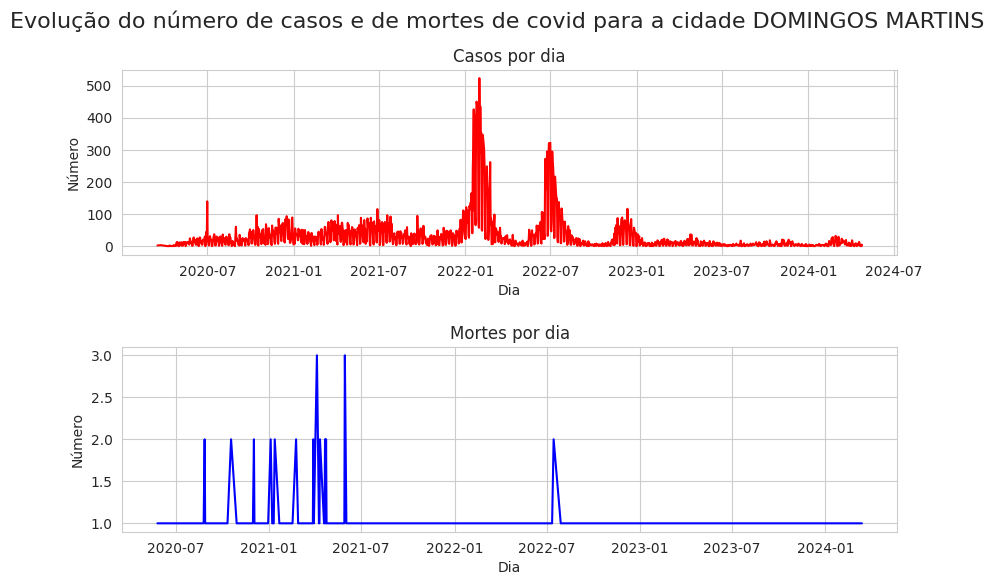

In [402]:
fig, my_axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))
fig.subplots_adjust(hspace=0.5)
fig.suptitle("Evolução do número de casos e de mortes de covid para a cidade {}".format(city), fontsize=16)

my_ax_0 = sns.lineplot(data=cases_per_day, x="DataNotificacao", y="Casos", color="r", ax=my_axes[0])
my_ax_0.set(title="Casos por dia", xlabel="Dia", ylabel="Número")

my_ax_1 = sns.lineplot(data=deaths_per_day, x="DataObito", y="Obitos", color="b", ax=my_axes[1])
my_ax_1.set(title="Mortes por dia", xlabel="Dia", ylabel="Número")

2. Fazendo um gráfico que mostre a dispersão de número de casos por idade dados um grupo de cidades

In [403]:
# Filter the DataFrame to include only the desired cities
desired_cities = ["VITORIA", "SERRA", "VILA VELHA", "DOMINGOS MARTINS"]  # Example list of desired cities
df_cities = data[data["Municipio"].isin(desired_cities)]

# Função para extrair apenas os anos da idade
def age_in_years(age_str):
    years_str = age_str.split(' ')[0]
    try:
        years = int(years_str)
    except ValueError:
        years = 0
    return years

# Converter a idade para anos e criar uma nova coluna 'IdadeAnos'
df_cities["IdadeAnos"] = df_cities["IdadeNaDataNotificacao"].apply(age_in_years)
df_cities

/tmp/ipykernel_7165/902043652.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cities["IdadeAnos"] = df_cities["IdadeNaDataNotificacao"].apply(age_in_years)


,DataNotificacao,DataDiagnostico,DataObito,Classificacao,Municipio,IdadeNaDataNotificacao,ComorbidadePulmao,ComorbidadeCardio,ComorbidadeRenal,ComorbidadeDiabetes,ComorbidadeTabagismo,ComorbidadeObesidade,FicouInternado,IdadeAnos
1997998,2022-02-02,2020-01-30,NaT,Confirmados,DOMINGOS MARTINS,"9 anos, 5 meses, 7 dias",Não,Não,Não,Não,Não,Não,Não Informado,9
5046341,2020-03-17,2020-03-13,NaT,Descartados,DOMINGOS MARTINS,"34 anos, 9 meses, 11 dias",Não,Não,Não,Não,Não,Não,Não Informado,34
5046349,2020-03-17,2020-03-14,NaT,Descartados,DOMINGOS MARTINS,"58 anos, 4 meses, 16 dias",Não,Não,Não,Não,Não,Não,Não Informado,58
5046337,2020-03-17,2020-03-15,NaT,Descartados,DOMINGOS MARTINS,"33 anos, 10 meses, 30 dias",Não,Não,Não,Não,Não,Não,Não Informado,33
5045818,2020-03-24,2020-03-17,NaT,Descartados,DOMINGOS MARTINS,"52 anos, 3 meses, 17 dias",Não,Não,Não,Sim,Não,Não,Não Informado,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,2024-04-24,2024-04-23,NaT,Suspeito,VITORIA,"0 anos, 0 meses, 29 dias",Não,Não,Não,Não,Não,Não,Não,0
302,2024-04-24,2024-04-23,NaT,Suspeito,VITORIA,"34 anos, 7 meses, 13 dias",Não,Não,Não,Não,Não,Não,Não,34
305,2024-04-24,2024-04-23,NaT,Suspeito,VITORIA,"48 anos, 0 meses, 1 dias",Não,Sim,Não,Não,Não,Não,Não,48
307,2024-04-24,2024-04-23,NaT,Suspeito,VITORIA,"94 anos, 8 meses, 25 dias",Não,Sim,Não,Não,Não,Não,Não,94


In [404]:
cases_per_day = df_city.groupby(by="DataNotificacao").size().reset_index(name='Casos')
cases_by_age = df_cities.groupby(by=["IdadeAnos", "Municipio"]).size().reset_index(name="Numero")
cases_by_age


,IdadeAnos,Municipio,Numero
0,-1,SERRA,11
1,-1,VILA VELHA,9
2,-1,VITORIA,38
3,0,DOMINGOS MARTINS,305
4,0,SERRA,6572
...,...,...,...
436,112,VITORIA,1
437,113,VILA VELHA,1
438,114,VITORIA,1
439,121,SERRA,1


[Text(0.5, 1.0, 'Dispersão do número de casos por idade para o grupo de cidades selecionado')]

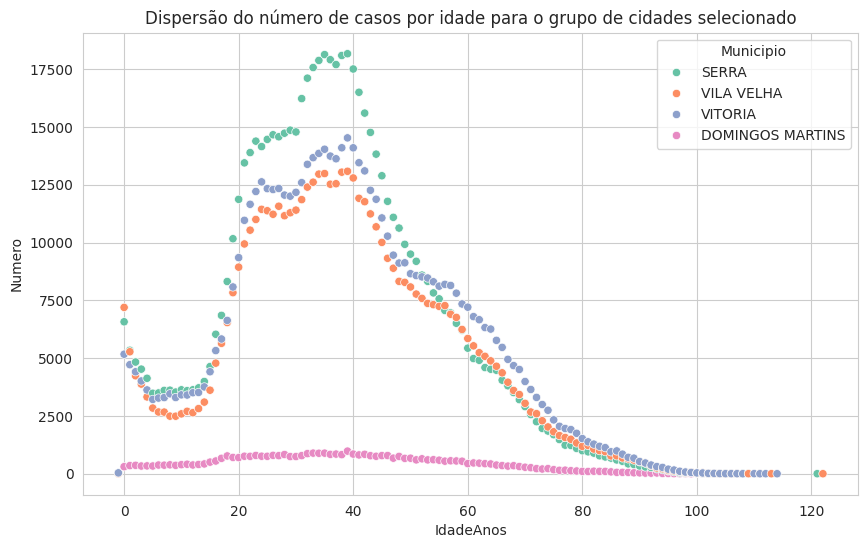

In [405]:
# Plot the scatter plot using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=cases_by_age, x="IdadeAnos", y="Numero", hue="Municipio", palette="Set2")
ax.set(title="Dispersão do número de casos por idade para o grupo de cidades selecionado")

3. Fazendo um ou mais gráfico que mostre a variação de casos dado grupo de cidades

In [406]:
# Filter the DataFrame to include only the desired cities
desired_cities = ["VITORIA", "SERRA"]  # Example list of desired cities
df_cities = data[data["Municipio"].isin(desired_cities)]
cases_per_day_city = df_cities.groupby(['DataNotificacao', 'Municipio']).size().reset_index(name='Casos')
cases_per_day_city

,DataNotificacao,Municipio,Casos
0,2020-02-25,SERRA,1
1,2020-03-01,VITORIA,1
2,2020-03-04,VITORIA,1
3,2020-03-06,VITORIA,3
4,2020-03-07,VITORIA,1
...,...,...,...
3014,2024-04-22,VITORIA,86
3015,2024-04-23,SERRA,29
3016,2024-04-23,VITORIA,99
3017,2024-04-24,SERRA,51


[Text(0.5, 1.0, 'Variação de casos para o grupo de cidades selecionado')]

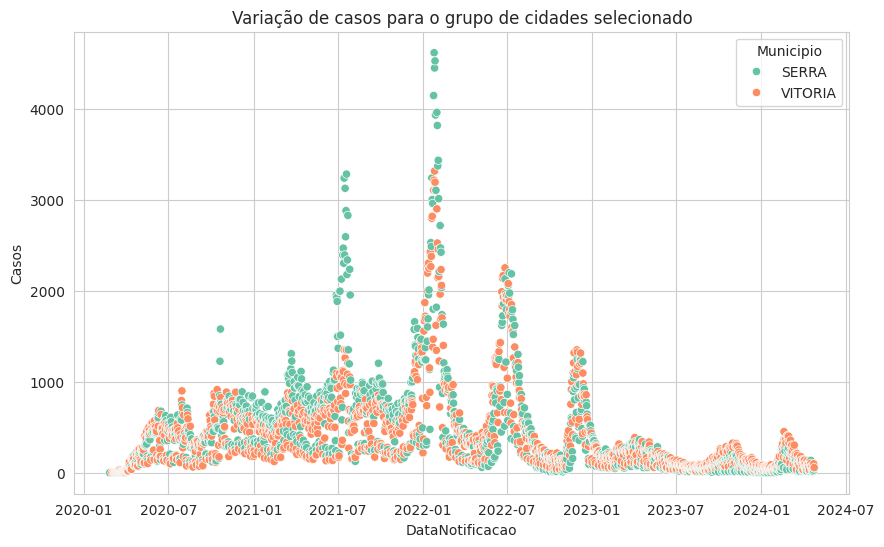

In [407]:
# Plot the scatter plot using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=cases_per_day_city, x="DataNotificacao", y="Casos", hue="Municipio", palette="Set2")
ax.set(title="Variação de casos para o grupo de cidades selecionado")

4. Fazendo um ou mais gráficos que mostre o ranking the casos dado um grupo de cidades

In [408]:
# Filter the DataFrame to include only the desired cities
desired_cities = ['VITORIA', 'SERRA', 'VILA VELHA', 'DOMINGOS MARTINS']  # Example list of desired cities
df_cities = data[data["Municipio"].isin(desired_cities)]

cases_per_day_city = df_cities.groupby(['Municipio']).size().reset_index(name='Casos')
cases_per_day_city


,Municipio,Casos
0,DOMINGOS MARTINS,45440
1,SERRA,694949
2,VILA VELHA,567317
3,VITORIA,634458


[Text(0.5, 1.0, 'Ranking de casos para o grupo de cidades selecionado')]

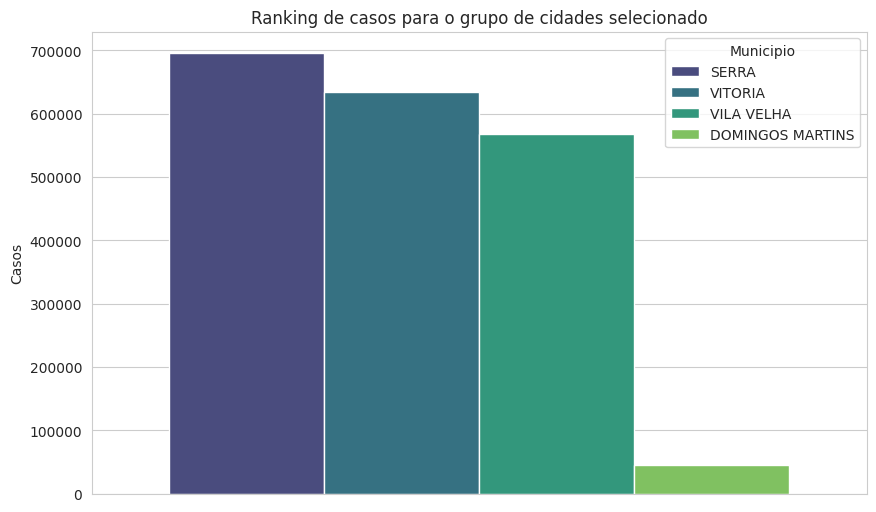

In [409]:
# Sort the DataFrame by number of cases in descending order
cases_per_city_sorted = cases_per_day_city.sort_values(by='Casos', ascending=False)

# Plot the ranking of cases using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=cases_per_city_sorted, hue='Municipio', y='Casos', palette='viridis', legend=True)
ax.set(title="Ranking de casos para o grupo de cidades selecionado")

5. Tópico criativo: crie um gráfico que você ache interessante e que não foi listado nos 4 itens anteriores

In [410]:
# Filter the DataFrame to include only the desired cities
desired_cities = ['VITORIA', 'SERRA', 'VILA VELHA', 'DOMINGOS MARTINS']  # Example list of desired cities
df_cities = data[data['Municipio'].isin(desired_cities)]

# Função para extrair apenas os anos da idade
def age_in_years(age_str):
    years_str = age_str.split(' ')[0]
    try:
        years = int(years_str)
    except ValueError:
        years = 0
    return years

# Converter a idade para anos e criar uma nova coluna 'IdadeAnos'
df_cities["IdadeAnos"] = df_cities["IdadeNaDataNotificacao"].apply(age_in_years)
df_cities


/tmp/ipykernel_7165/2583713651.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cities["IdadeAnos"] = df_cities["IdadeNaDataNotificacao"].apply(age_in_years)


,DataNotificacao,DataDiagnostico,DataObito,Classificacao,Municipio,IdadeNaDataNotificacao,ComorbidadePulmao,ComorbidadeCardio,ComorbidadeRenal,ComorbidadeDiabetes,ComorbidadeTabagismo,ComorbidadeObesidade,FicouInternado,IdadeAnos
1997998,2022-02-02,2020-01-30,NaT,Confirmados,DOMINGOS MARTINS,"9 anos, 5 meses, 7 dias",Não,Não,Não,Não,Não,Não,Não Informado,9
5046341,2020-03-17,2020-03-13,NaT,Descartados,DOMINGOS MARTINS,"34 anos, 9 meses, 11 dias",Não,Não,Não,Não,Não,Não,Não Informado,34
5046349,2020-03-17,2020-03-14,NaT,Descartados,DOMINGOS MARTINS,"58 anos, 4 meses, 16 dias",Não,Não,Não,Não,Não,Não,Não Informado,58
5046337,2020-03-17,2020-03-15,NaT,Descartados,DOMINGOS MARTINS,"33 anos, 10 meses, 30 dias",Não,Não,Não,Não,Não,Não,Não Informado,33
5045818,2020-03-24,2020-03-17,NaT,Descartados,DOMINGOS MARTINS,"52 anos, 3 meses, 17 dias",Não,Não,Não,Sim,Não,Não,Não Informado,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,2024-04-24,2024-04-23,NaT,Suspeito,VITORIA,"0 anos, 0 meses, 29 dias",Não,Não,Não,Não,Não,Não,Não,0
302,2024-04-24,2024-04-23,NaT,Suspeito,VITORIA,"34 anos, 7 meses, 13 dias",Não,Não,Não,Não,Não,Não,Não,34
305,2024-04-24,2024-04-23,NaT,Suspeito,VITORIA,"48 anos, 0 meses, 1 dias",Não,Sim,Não,Não,Não,Não,Não,48
307,2024-04-24,2024-04-23,NaT,Suspeito,VITORIA,"94 anos, 8 meses, 25 dias",Não,Sim,Não,Não,Não,Não,Não,94


In [411]:
# Define the age groups
bins = [0, 18, 30, 50, 70, 100]
labels = ["0-18", "19-30", "31-50", "51-70", "71+"]
df_cities["FaixaEtaria"] = pd.cut(df_cities["IdadeAnos"], bins=bins, labels=labels, right=False)
df_cities

/tmp/ipykernel_7165/1743449726.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cities["FaixaEtaria"] = pd.cut(df_cities["IdadeAnos"], bins=bins, labels=labels, right=False)


,DataNotificacao,DataDiagnostico,DataObito,Classificacao,Municipio,IdadeNaDataNotificacao,ComorbidadePulmao,ComorbidadeCardio,ComorbidadeRenal,ComorbidadeDiabetes,ComorbidadeTabagismo,ComorbidadeObesidade,FicouInternado,IdadeAnos,FaixaEtaria
1997998,2022-02-02,2020-01-30,NaT,Confirmados,DOMINGOS MARTINS,"9 anos, 5 meses, 7 dias",Não,Não,Não,Não,Não,Não,Não Informado,9,0-18
5046341,2020-03-17,2020-03-13,NaT,Descartados,DOMINGOS MARTINS,"34 anos, 9 meses, 11 dias",Não,Não,Não,Não,Não,Não,Não Informado,34,31-50
5046349,2020-03-17,2020-03-14,NaT,Descartados,DOMINGOS MARTINS,"58 anos, 4 meses, 16 dias",Não,Não,Não,Não,Não,Não,Não Informado,58,51-70
5046337,2020-03-17,2020-03-15,NaT,Descartados,DOMINGOS MARTINS,"33 anos, 10 meses, 30 dias",Não,Não,Não,Não,Não,Não,Não Informado,33,31-50
5045818,2020-03-24,2020-03-17,NaT,Descartados,DOMINGOS MARTINS,"52 anos, 3 meses, 17 dias",Não,Não,Não,Sim,Não,Não,Não Informado,52,51-70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,2024-04-24,2024-04-23,NaT,Suspeito,VITORIA,"0 anos, 0 meses, 29 dias",Não,Não,Não,Não,Não,Não,Não,0,0-18
302,2024-04-24,2024-04-23,NaT,Suspeito,VITORIA,"34 anos, 7 meses, 13 dias",Não,Não,Não,Não,Não,Não,Não,34,31-50
305,2024-04-24,2024-04-23,NaT,Suspeito,VITORIA,"48 anos, 0 meses, 1 dias",Não,Sim,Não,Não,Não,Não,Não,48,31-50
307,2024-04-24,2024-04-23,NaT,Suspeito,VITORIA,"94 anos, 8 meses, 25 dias",Não,Sim,Não,Não,Não,Não,Não,94,71+


In [412]:
cases_per_age_group = df_cities.groupby(["Municipio", "FaixaEtaria"]).size().reset_index(name="Numero")
cases_per_age_group

/tmp/ipykernel_7165/2111132753.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cases_per_age_group = df_cities.groupby(["Municipio", "FaixaEtaria"]).size().reset_index(name="Numero")


,Municipio,FaixaEtaria,Numero
0,DOMINGOS MARTINS,0-18,7259
1,DOMINGOS MARTINS,19-30,9144
2,DOMINGOS MARTINS,31-50,16268
3,DOMINGOS MARTINS,51-70,9855
4,DOMINGOS MARTINS,71+,2909
5,SERRA,0-18,79201
6,SERRA,19-30,159512
7,SERRA,31-50,308065
8,SERRA,51-70,121210
9,SERRA,71+,26864


[Text(0.5, 1.0, 'Casos de COVID-19 por faixa etária do grupo de cidades selecionado')]

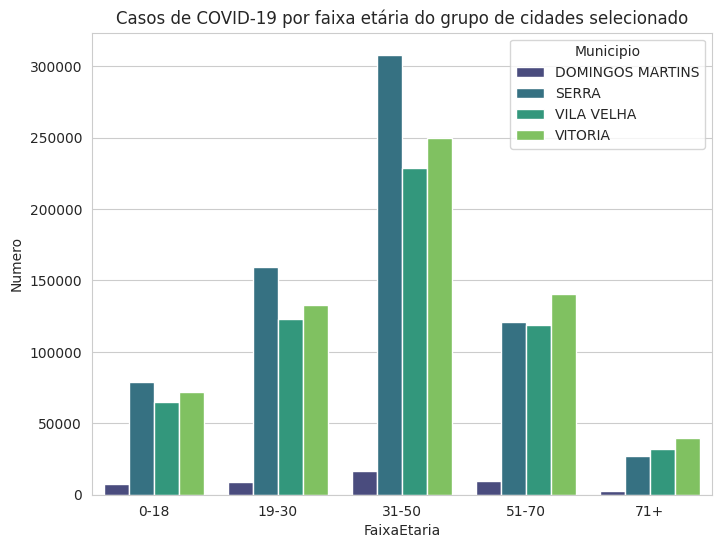

In [413]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=cases_per_age_group, x='FaixaEtaria', y='Numero', hue="Municipio", palette='viridis')
ax.set(title="Casos de COVID-19 por faixa etária do grupo de cidades selecionado")